<a href="https://colab.research.google.com/github/FXLJA/TIF24-32180082/blob/master/Tugas_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


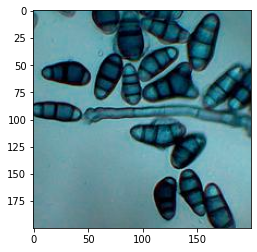

In [2]:
import numpy
import cv2 as cv
from matplotlib import pyplot as plt

#Display image
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Assets/Bakteri_A.jpeg')
plt.imshow(img)

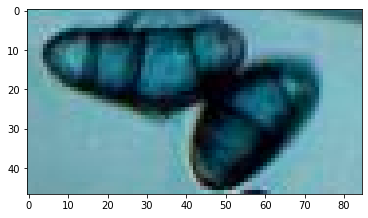

In [3]:
#Cut image section
img_section = img[100:147, 85:170]
plt.imshow(img_section)

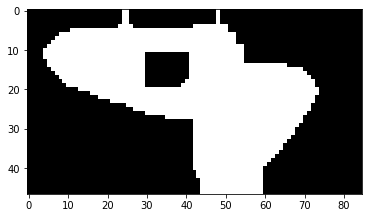

In [4]:
#Binarize + morphology operation (closing: dilate -> erode)

#Grayscale image
#cvtColor(ImageTarget, cv.OperationType)
img_section_grayscale = cv.cvtColor(img_section, cv.COLOR_RGB2GRAY)

#Binarize image
#threshold(ImageTarget, ThresholdValue, MaxColorValue, cv.OperationType)
#         << returns 2 variables including new image (i.e. "target")
ret,target = cv.threshold(img_section_grayscale,60,255,cv.THRESH_BINARY_INV)

kernel = numpy.ones((7,7),numpy.uint8)

#Closing morphology operation
#morphologyEx(ImageTarget, cv.OperationType, Kernel)
#         << kernels must be odd due to its nature as a matrix
closing = cv.morphologyEx(target, cv.MORPH_CLOSE, kernel)

#Load image in grayscale
plt.imshow(closing, 'gray')

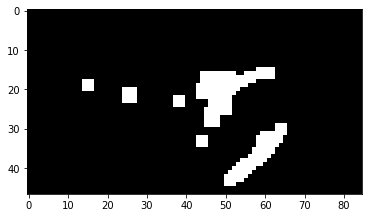

In [5]:
ret,target2 = cv.threshold(img_section_grayscale,20,255,cv.THRESH_BINARY_INV)

kernel_open = numpy.ones((3,3),numpy.uint8)

opening = cv.morphologyEx(target2, cv.MORPH_OPEN, kernel_open)
plt.imshow(opening, 'gray')

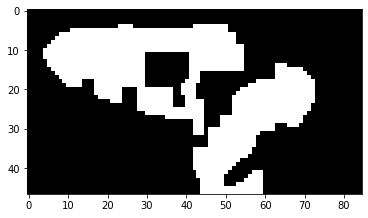

In [6]:
#Arithmetic operation (subtraction)
result = cv.subtract(closing, opening)
result_open = cv.morphologyEx(result, cv.MORPH_OPEN, kernel_open)
plt.imshow(result_open, 'gray')

In [7]:
#Calculate centroid position
def get_centroid(contour):
  M = cv.moments(contour)

  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  return (cx, cy)

In [15]:
  contours,hierarchy = cv.findContours(result_open, 1, 2)

  centroid_1 = get_centroid(contours[0])
  centroid_2 = get_centroid(contours[1])

  print("Centroid 1 :", centroid_1)
  print("Centroid 2 :", centroid_2)

Centroid 1 : (56, 29)
Centroid 2 : (40, 13)


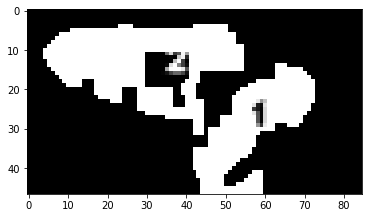

In [12]:
#Labeling
#putText(ImageTarget, 'Text', Position, cv.Font, FontScale, (R, G, B), FontWeight, cv.LineType)
result_labeled = cv.putText(
    result_open, '1', centroid_1, 
    cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 
   0.25, (0, 0, 0), 1, cv.LINE_AA)

result_labeled = cv.putText(
    result_open, '2', centroid_2, 
    cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 
   0.25, (255, 255, 255), 1, cv.LINE_AA)

plt.imshow(result_labeled, 'gray')

In [10]:
#Calculate distance
import math

def euclidean_distance(p1, p2):
  a = p1[0] - p2[0]
  b = p1[1] - p2[1]

  return math.sqrt( a*a + b*b )

In [13]:
dist = euclidean_distance(centroid_1, centroid_2)

print("Jarak centroid antar kedua objek adalah", dist)

Jarak centroid antar kedua objek adalah 25.238858928247925
